By: Mohd Tabish Husain

Data Science and Business Analyst Internship at The Sparks Foundation (September 2022)

Task 2 - Prediction Using Unsupervised ML

# Step 1 - Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2 - Loading the Iris Dataset and Printing Data

In [88]:
#Loading IRIS dataset
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [89]:
#Loading ID dataset
id=pd.read_csv('~/ID.csv')
id

,ID
0,1
1,2
2,3
3,4
4,5
...,...
145,146
146,147
147,148
148,149


In [90]:
#Inserting ID column in IRIS dataset
df.insert(0,'ID',id)

In [91]:
#Printing first 5 rows
df.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [92]:
#Printing last 5 rows
df.tail()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


# Step 3 - Analysing the data

In [75]:
#Calculating mean, standard deviation etc.
df.describe()

,ID,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [77]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [78]:
#Checking for missing values
df.isnull().sum()

ID              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [79]:
#Checking Correlation
corr=df.corr()
corr

,ID,sepal_length,sepal_width,petal_length,petal_width
ID,1.000000,0.716676,-0.402301,0.882637,0.900027
sepal_length,0.716676,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.882637,0.871754,-0.428440,1.000000,0.962865
petal_width,0.900027,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

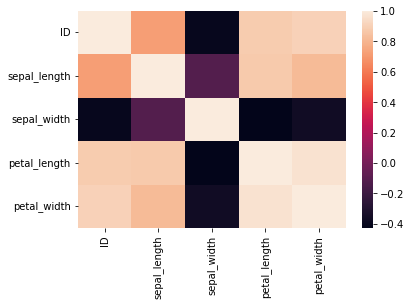

In [80]:
#Visualising Correlation on heatmap
sns.heatmap(corr)

# Step 4 - Finding the optimum number of clusters for k means classification using the elbow method

In [81]:
from sklearn.cluster import KMeans
X = df.iloc[:,0:4].values
#Within cluster sum of squares (wcss)
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=250, n_init=10, random_state=20)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# In order to observe the elbow we have to plot the result on a line graph

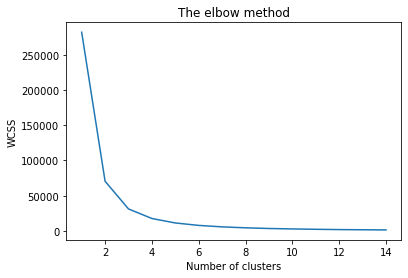

In [82]:
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# Step 5 - Applying the kmeans to dataset and visualizing the clusters

In [83]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

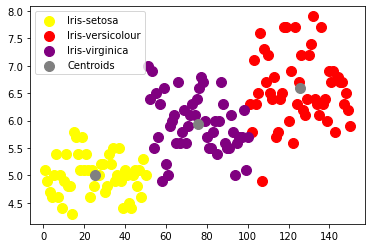

In [87]:
#Visualizing the clusters on the first 2 columns and Plotting the Centroids

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'grey', label = 'Centroids')

plt.legend()